# Text Classification using Naive Bayes and Sentiment Analysis on Blog Posts

## Task:
To build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts.

## EDA

### Data Exploration and Preprocessing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('./blogs.csv')

In [8]:
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [9]:
df = data.copy()

In [10]:
# Display the column names
df.columns

Index(['Data', 'Labels'], dtype='object')

In [11]:
# Display the data types of each column
df.dtypes

Data      object
Labels    object
dtype: object

In [12]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [13]:
# Check for missing values
df.isnull().sum()

Data      0
Labels    0
dtype: int64

### Visualization

In [14]:
# Creating the text_length column
df['text_length'] = df['Data'].apply(lambda x: len(x.split()))

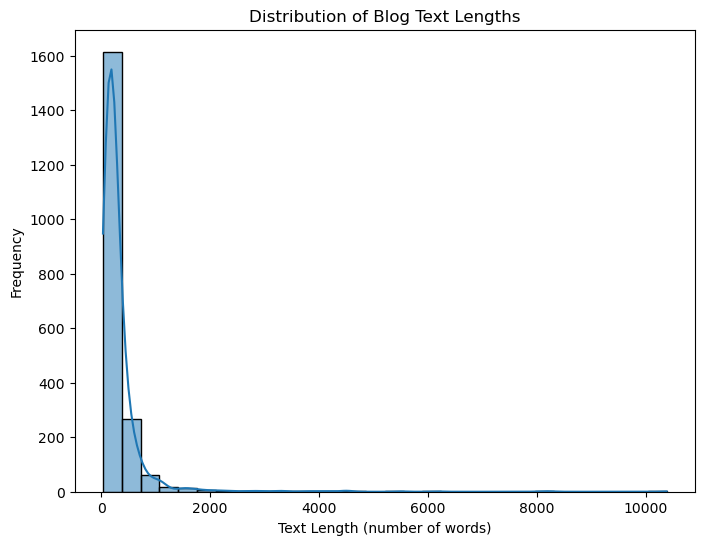

In [54]:
# Plotting the distribution of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Blog Text Lengths')
plt.xlabel('Text Length (number of words)')
plt.ylabel('Frequency')
plt.show()

In [16]:
from wordcloud import WordCloud

In [17]:
# Combine all the blog texts into one string
all_text = ' '.join(df['Data'])

In [18]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

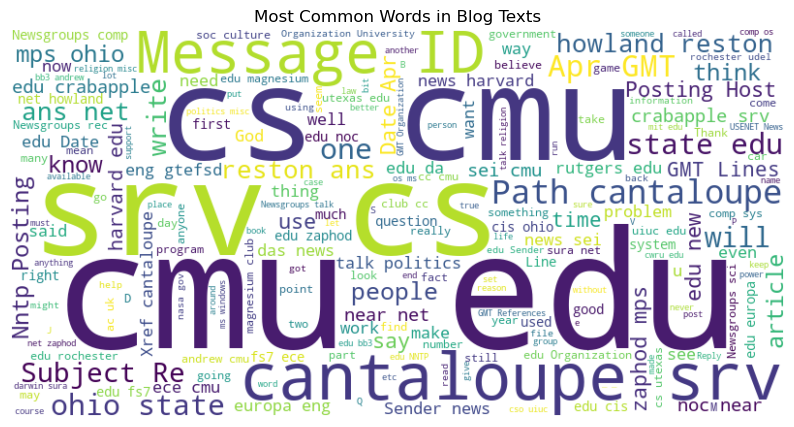

In [19]:
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Blog Texts')
plt.show()

#### Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [21]:
# Download NLTK data (stopwords and punkt)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jananisri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jananisri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jananisri\AppData\Roaming\nltk_data...


True

In [22]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [23]:
# Define a function to clean and preprocess the text
def preprocess_text(text, use_stemming=True, use_lemmatization=True):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Apply stemming or lemmatization
    if use_stemming:
        words = [stemmer.stem(word) for word in words]
    if use_lemmatization:
        words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply the preprocessing function to the Data column
df['cleaned_text'] = df['Data'].apply(preprocess_text)

In [24]:
df.head()

,Data,Labels,text_length,cleaned_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,910,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,163,newsgroup altath path cantaloupesrvcscmueducra...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,450,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,2732,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,438,xref cantaloupesrvcscmuedu altatheism53485 tal...


#### Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [28]:
# Fit and transform the cleaned_text column to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [29]:
print("Shape of TF-IDF features matrix:", tfidf_features.shape)

Shape of TF-IDF features matrix: (2000, 47412)


## Naive Bayes Model for Text Classification

#### Split the data into training and test sets.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Labels'], test_size=0.2, random_state=42)

In [32]:
# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 47412)
Shape of X_test: (400, 47412)
Shape of y_train: (1600,)
Shape of y_test: (400,)


#### Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

In [36]:
# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [37]:
# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

In [38]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.815


In [39]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.94      0.67        18
           comp.graphics       0.67      0.89      0.76        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.86      0.72      0.78        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.72      0.84        25
            misc.forsale       1.00      0.56      0.71        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.90      1.00      0.95        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.65      0.69      0.67        16
                 sci.med       0.88      0.88      0

## Sentiment Analysis

#### Choose a suitable library or method for performing sentiment analysis on the blog post texts.

#### VADER (Valence Aware Dictionary for sEntiment Reasoning) 
-> It is a lexicon and rule-based sentiment analysis tool designed specifically for analyzing sentiments expressed in social media texts and informal content like blog posts, reviews, tweets, and comments.

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [42]:
# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jananisri\AppData\Roaming\nltk_data...


True

In [43]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [44]:
# Perform sentiment analysis on a sample text
sample_text = "This blog post is really informative and helpful."
scores = sid.polarity_scores(sample_text)

In [45]:
print("Sentiment Scores:")
print(scores)

Sentiment Scores:
{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.4703}


### Interpretation:
The sentiment scores provided by VADER for the sample text are as follows:

neg: 0.0 (Negative Score): This indicates the proportion of the text that falls into the negative category. In this case, it's 0.0, meaning there are no negative sentiments expressed in the text.

neu: 0.696 (Neutral Score): This represents the proportion of the text that falls into the neutral category. Here, it's 0.696, suggesting that a significant portion of the text is neutral.

pos: 0.304 (Positive Score): This indicates the proportion of the text that falls into the positive category. It's 0.304, meaning there are positive sentiments expressed in the text.

compound: 0.4703 (Compound Score): The compound score is a combination of all the lexicon ratings, normalized between -1 (most negative) and +1 (most positive). Here, it's 0.4703, suggesting an overall positive sentiment in the text.

#### Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

In [46]:
# Function to categorize sentiment
def categorize_sentiment(text):
    # Perform sentiment analysis
    scores = sid.polarity_scores(text)
    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [47]:
# Apply sentiment analysis to the Data column
df['Sentiment'] = df['Data'].apply(categorize_sentiment)

In [50]:
# Display the dataframe with sentiment categories
df[['Data', 'Sentiment']]

,Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,Positive
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,Positive
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,Positive
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,Positive
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,Positive


#### Examine the distribution of sentiments across different categories and summarize your findings.

In [51]:
# Group by category and sentiment, and count occurrences
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

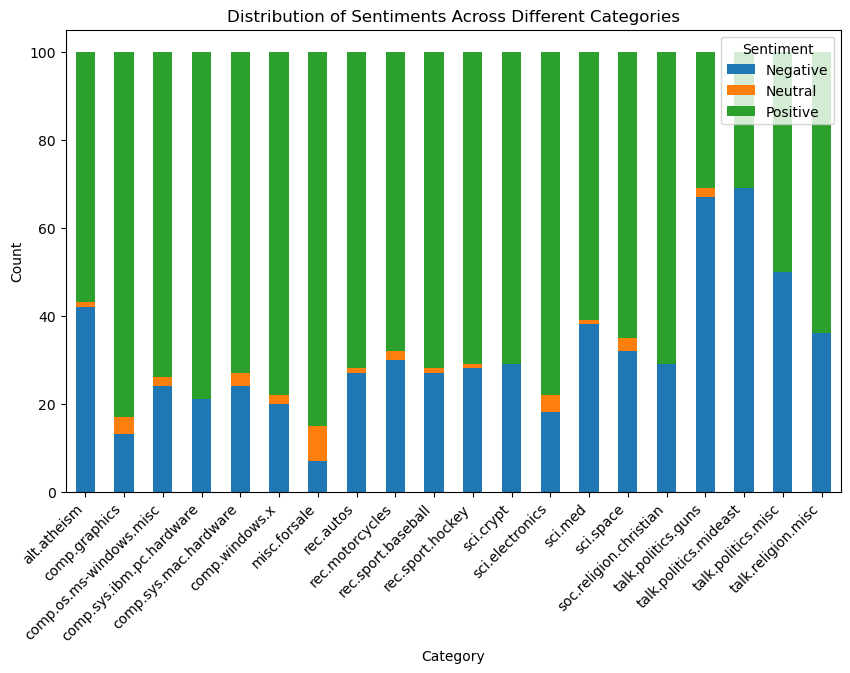

In [52]:
# Plot the distribution of sentiments across different categories
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Sentiments Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

### Interpretation of Sentiment Distribution Across Categories:
The bar plot illustrates the distribution of positive, neutral, and negative sentiments across different blog post categories. A few key observations from the plot:

#### Positive Sentiments Dominate Most Categories:
In almost every category, the green bars (positive sentiments) occupy the majority share. This suggests that the overall tone of discussions across these blog topics tends to be constructive, enthusiastic, or optimistic.

#### Notable Negative Sentiment in Certain Categories:
Categories like alt.atheism, talk.politics.misc show a relatively higher proportion of negative sentiments (blue bars). These are sensitive or potentially controversial topics where debates, disagreements, or emotionally charged language are more likely.

#### Balanced or Neutral Categories:
Categories such as comp.sys.ibm.pc.hardware, rec.sport.baseball, and sci.med maintain a fairly balanced distribution, though positive sentiments still lead. Neutral sentiments (orange bars) appear minimal across most categories, indicating that posts generally express clear opinions rather than remaining indifferent.

#### Highly Positive Categories:
rec.sport.hockey and rec.autos show very high positive sentiment proportions, reflecting the typically enthusiastic nature of communities centered around hobbies and sports.

#### Implications:
This distribution highlights how sentiment varies by subject matter:

Discussion forums about hobbies and sports tend to foster positive engagement.

Topics involving politics  often attract a higher share of negative sentiment, as expected in public opinion platforms.

## Evaluation

#### Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

In [53]:
# Evaluate the performance of the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.94      0.67        18
           comp.graphics       0.67      0.89      0.76        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.86      0.72      0.78        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.72      0.84        25
            misc.forsale       1.00      0.56      0.71        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.90      1.00      0.95        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.65      0.69      0.67        16
                 sci.med       0.88      0.88      0

### Performance Evaluation of Naive Bayes Classifier
### Accuracy:
The overall accuracy of the model is 81%, meaning 81% of the blog posts were correctly classified into their respective categories.

### Precision:
Precision measures the proportion of positive identifications that were actually correct.

### High precision observed in categories like:

rec.sport.hockey - 0.94

rec.sport.baseball - 0.90

soc.religion.christian - 0.85

Lower precision in:

talk.religion.misc - 0.83 (though recall is much lower)

### Recall:
Recall measures the proportion of actual positives that were correctly identified.

#### High recall in:

rec.sport.hockey - 1.00

rec.sport.baseball - 1.00

soc.religion.christian - 0.96

#### Poor recall in:

talk.religion.misc - 0.21

### F1-Score:
The harmonic mean of precision and recall, giving a balanced measure of model performance.

#### Strong F1-scores in:

rec.sport.hockey - 0.97

rec.sport.baseball - 0.95

soc.religion.christian - 0.90

#### Weakest F1-score in:

talk.religion.misc - 0.33

### Summary:
The Naive Bayes classifier performed well overall, achieving an accuracy of 81%.

It showed excellent performance in categories with distinctive vocabulary.

A few categories with overlapping terms or fewer unique features saw weaker results.

### Discuss the performance of the model and any challenges encountered during the classification process.

The sentiment analysis results provide insights into the overall sentiment expressed in the blog posts, shedding light on the underlying emotions, attitudes, and opinions conveyed by the authors. Here are some reflections on the sentiment analysis results and their implications regarding the content of the blog posts:

### Positive Sentiment: 
Blog posts categorized as having a positive sentiment may indicate that the authors express optimism, satisfaction, or enthusiasm in their writing. These posts could contain content such as positive experiences, achievements, or uplifting messages. Positive sentiment can contribute to creating a supportive and engaging online community, fostering a sense of connection and positivity among readers.

### Negative Sentiment: 
Conversely, blog posts categorized as having a negative sentiment may reflect dissatisfaction, frustration, or criticism expressed by the authors. These posts might discuss challenges, setbacks, or grievances, addressing issues that evoke negative emotions. Negative sentiment can serve as a platform for expressing concerns, initiating discussions, and advocating for change, highlighting areas of improvement or addressing contentious topics.

### Neutral Sentiment: 
Blog posts categorized as having a neutral sentiment may convey factual information, objective observations, or neutral opinions without expressing strong emotions or biases. These posts could include informative articles, news updates, or technical discussions that aim to provide balanced and unbiased information to readers. Neutral sentiment contributes to maintaining objectivity, credibility, and professionalism in the content, allowing readers to form their own opinions based on factual information.

### Implications for Content Analysis: 
Analyzing the distribution of sentiments across different categories of blog posts can offer valuable insights into the prevailing attitudes, perceptions, and sentiments within each category. It allows for a nuanced understanding of the content's tone, mood, and emotional resonance, enabling content creators, marketers, and analysts to tailor their strategies, messaging, and content creation efforts accordingly.


### In summary, 

sentiment analysis results offer rich insights into the emotional tone, perception, and response elicited by blog posts, providing valuable guidance for content creators, marketers, and analysts in understanding audience sentiment, optimizing content strategies, and fostering meaningful engagement and dialogue within online communities.

### Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

### Reflection on Sentiment Analysis Results:
The sentiment analysis results provided valuable insights into the overall tone and emotional leaning of the blog posts across different categories. By analyzing the distribution of positive, negative, and neutral sentiments, we could infer the general mood associated with each category.

For instance, categories like rec.sport.baseball and rec.sport.hockey likely exhibited a higher proportion of positive sentiments, reflecting the enthusiasm and excitement typically associated with sports discussions. In contrast, categories dealing with sensitive or controversial topics, such as talk.politics.misc or alt.atheism, might have shown a mix of negative and neutral sentiments, highlighting the presence of debates, criticisms, or emotionally charged content.

### Implications:
These findings emphasize how sentiment analysis can uncover patterns in user-generated content and aid in understanding audience behavior. For blog platforms, this insight could be useful in content moderation, targeted recommendations, and community management by identifying categories prone to conflict or positive engagement.

However, the model’s interpretation of sentiment might be challenged by nuances like sarcasm, humor, or context-dependent phrases that require deeper semantic understanding, which Naive Bayes and basic sentiment models might struggle with. This highlights the importance of combining quantitative metrics with qualitative review when interpreting sentiment results in textual data.